**Title: Heart Disease Predictor**
-

**Introduction**
-
This dataset is about the records of 303 individuals in Cleveland. The diagnosis of heart disease is based on the variable call "num". If the num's value is 0, it means the individual is not diagnosed as having heart disease, but if the value is equal to or larger than 1, it is typically considered having heart disease. I have to clarify the data, which consists of 14 variables that are modifiable risk factors. This means they are related to lifestyle choices such as diet, physical activity, or anything unrelated to genes. This project aims to use my existing knowledge to enhance my understanding of heart disease by finding the correlation between those variables and heart disease to build a prediction heart disease model.

**Question**
-

Is it possible to develop a predictive model to identify whether an individual has heart disease?

**Dataset**
-

* Datatype: numerical and categorical data
* Variables (use) :
  - `age` : age in year
  - `sex` : (1 = male; 0 = female)
  - `cp` : chest pain type
      - Value 1: typical angina
      - Value 2: atypical angina
      - Value 3: non-anginal pain
      - Value 4: asymptomatictic
  - `trestbps` : resting blood pressure (in mm Hg on admission to the hospital)
  - `chol`serum cholestoral in mg/dlia
  - `exang` exercise induced angina (1 = yes; 0 = no) :
  - `oldpeak` ST depression induced by exercise relative to rest
  - `thalach` : maximum heart rate achieved
  - `num` : diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing
   
**Methods**
- 
**Implementation Steps**
1. **Preprocess the Data**
   - scale numeric data and encode categorical variables. (There are no missing values)
2. **Split the Data**
   - Divide the dataset into training and testing sets to ensure model validation.
3. **Model Building**
   - Develop a KNN model (euclidean) using the training data.
4. **Model Evaluation**
   - Cross-validation, k-fold cross-validation will be utilized
   - Performance Metrics: Accuracy, precision, and recall will be computed. Also, confusion matrix.


**Visualization of Results**
-
1. **KNN Performance Plot**
   - visualize model performance across different values of k
2. **Confusion Matrix**

**Expected outcomes and significance**
-
1. What do you expect to find?
   * Using KNN algorithm for predicting heart disease, the expected outcome is the model can accurately classify individuals based on the selected variables.
2. What impact could such findings have?
   * The model can accurately predict heart disease can significantly impact patient care. Early detection of heart disease can lead to earlier interventions, potentially helping individuals avoid increasing the risk of getting heart disease. 
3. What future questions could this lead to?
   * Are those selected data enough for building a high-accuracy model? It is possible to integrate other types of data, like detaisl of dietary data. 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

data_cleveland <- read.table("data/heart_disease/processed.cleveland.data", sep = ",", col.names = col_names)

In [3]:
data_cleveland |> head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


**Select wanted data**
-

In [4]:
data_cleveland <- data_cleveland |>
    select(-fbs, -restecg, -slope, -thal, -ca)

data_cleveland |> head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,63,1,1,145,233,150,0,2.3,0
2,67,1,4,160,286,108,1,1.5,2
3,67,1,4,120,229,129,1,2.6,1
4,37,1,3,130,250,187,0,3.5,0
5,41,0,2,130,204,172,0,1.4,0
6,56,1,2,120,236,178,0,0.8,0


In [5]:
data_cleveland |> nrow()

[1] 303

**Splitting Data**
-

In [6]:
set.seed(123)

cleveland_split <- initial_split(data_cleveland, prop = 0.80, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

In [7]:
cleveland_train |> head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,63,1,1,145,233,150,0,2.3,0
2,41,0,2,130,204,172,0,1.4,0
3,56,1,2,120,236,178,0,0.8,0
4,57,0,4,120,354,163,1,0.6,0
5,57,1,4,140,192,148,0,0.4,0
6,56,0,2,140,294,153,0,1.3,0


In [8]:
cleveland_train |> nrow()

[1] 240

**Preprocessing Data**
-

**Checking the balancing of response (num)**

In [9]:
balance_table <- cleveland_train |>
                    group_by(num) |>
                    summarize(count = n())

balance_table

num,count
<int>,<int>
0,131
1,45
2,28
3,27
4,9


**Find out how many missing values for every variables**

In [10]:
missing_data_count <- cleveland_train |>
                        map_df(~sum(is.na(.)))

missing_data_count

age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


In [11]:
cleveland_train |> head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,63,1,1,145,233,150,0,2.3,0
2,41,0,2,130,204,172,0,1.4,0
3,56,1,2,120,236,178,0,0.8,0
4,57,0,4,120,354,163,1,0.6,0
5,57,1,4,140,192,148,0,0.4,0
6,56,0,2,140,294,153,0,1.3,0


**Correlation between variables**

Warning message in geom_histogram(color = "black", bin = 30):
“Ignoring unknown parameters: `bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


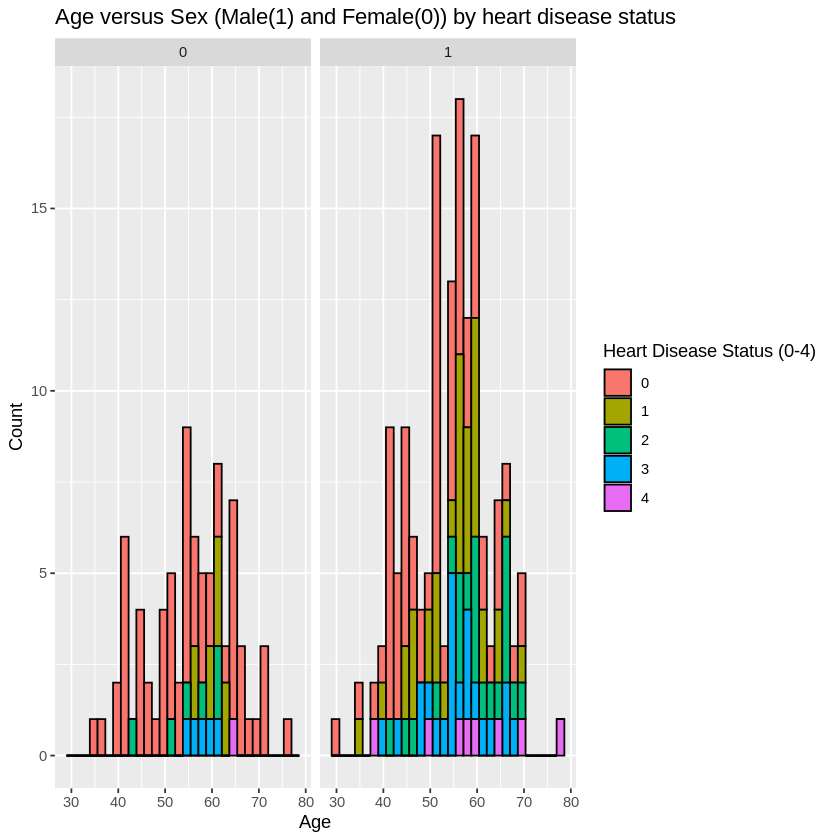

In [23]:
# Age, sex and num
age_sex_plot <- cleveland_train |>
    ggplot(aes(x = age, fill = as.factor(num))) +
    geom_histogram(color = "black", bin = 30) +
    labs(x = "Age", y = "Count", fill = "Heart Disease Status (0-4)") +
    facet_grid(cols = vars(sex)) +
    ggtitle("Age versus Sex (Male(1) and Female(0)) by heart disease status")

age_sex_plot

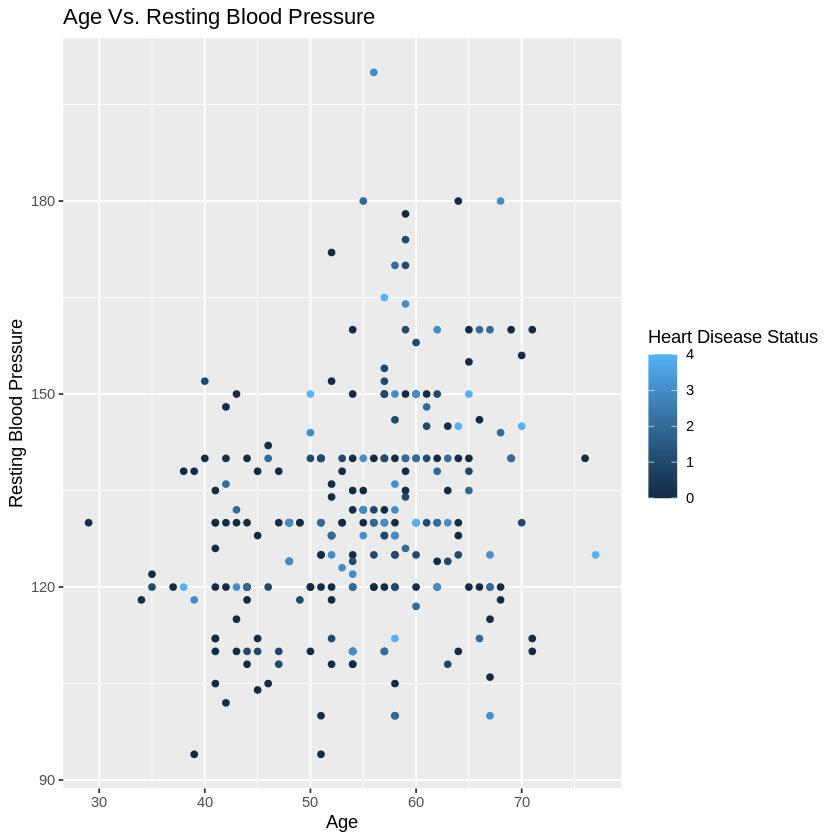

In [25]:
age_trestbps <- cleveland_train |>
    ggplot(aes(x = age, y = trestbps)) +
    geom_point(aes(color = num)) +
    labs(x = "Age", y = "Resting Blood Pressure", color = "Heart Disease Status") +
    ggtitle("Age Vs. Resting Blood Pressure")

age_trestbps